In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
import geopandas as gpd

In [3]:
df = gpd.read_file('https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2014-01-01&endtime=2014-01-02')

df.describe()

,mag,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,326.000000,3.260000e+02,3.260000e+02,1.0,1.0,2.000000,326.000000,326.000000,225.000000,257.000000,326.00000,264.000000
mean,1.479693,1.388578e+12,1.488382e+12,32.0,3.1,4.385500,0.003067,62.128834,16.448889,0.722739,0.26557,125.933258
std,1.367151,2.614801e+07,5.440828e+10,NaN,NaN,0.174655,0.055385,101.204570,13.508539,2.242265,0.35099,67.449180
min,-0.900000,1.388534e+12,1.388584e+12,32.0,3.1,4.262000,0.000000,0.000000,3.000000,0.000901,0.00020,14.000000
25%,0.530000,1.388554e+12,1.457722e+12,32.0,3.1,4.323750,0.000000,4.000000,7.000000,0.012610,0.04000,78.250000
50%,1.115000,1.388578e+12,1.486063e+12,32.0,3.1,4.385500,0.000000,19.000000,12.000000,0.056760,0.11000,114.000000
75%,1.900000,1.388602e+12,1.530313e+12,32.0,3.1,4.447250,0.000000,56.000000,20.000000,0.168300,0.39750,156.260000
max,6.500000,1.388620e+12,1.598476e+12,32.0,3.1,4.509000,1.000000,650.000000,77.000000,17.795000,3.09000,316.800000


In [4]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        326 non-null    object  
 1   mag       326 non-null    float64 
 2   place     325 non-null    object  
 3   time      326 non-null    int64   
 4   updated   326 non-null    int64   
 5   tz        0 non-null      object  
 6   url       326 non-null    object  
 7   detail    326 non-null    object  
 8   felt      1 non-null      float64 
 9   cdi       1 non-null      float64 
 10  mmi       2 non-null      float64 
 11  alert     1 non-null      object  
 12  status    326 non-null    object  
 13  tsunami   326 non-null    int64   
 14  sig       326 non-null    int64   
 15  net       326 non-null    object  
 16  code      326 non-null    object  
 17  ids       326 non-null    object  
 18  sources   326 non-null    object  
 19  types     326 non-null    object  
 20  ns

In [5]:
df['date'] = pd.to_datetime(df['time'],unit='ms')

In [16]:
df['lon'] = df.geometry.x
df['lat'] = df.geometry.y

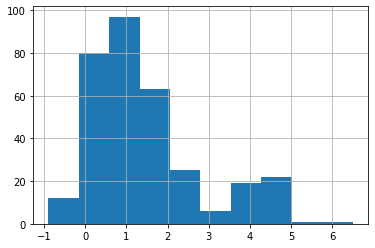

In [39]:
df['mag'].hist()

In [36]:
fig = px.scatter_mapbox(df, lat='lat',lon='lon', size='mag2')
fig.show()

In [38]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat='lat', lon='lon',size='mag2', mapbox_style="carto-positron")
fig.show()


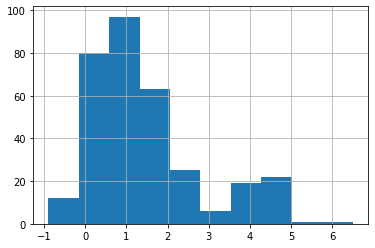

In [32]:
df.mag.hist()

In [35]:
df['mag2'] = df.mag.apply(lambda row: abs(row))

In [33]:
df.mag.apply(lambda row: abs(row))

0      1.29
1      1.10
2      1.20
3      1.40
4      4.00
       ... 
321    1.20
322    0.57
323    2.20
324    4.50
325    5.10
Name: mag, Length: 326, dtype: float64